In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Load the dataset
df = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')

# Data Cleaning
df = df.dropna()
df = df[df['Quantity'] > 0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])



In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
# RFM Analysis
current_date = max(df['InvoiceDate']) + pd.DateOffset(1)
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'UnitPrice': 'sum'
}).reset_index()

rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']



In [7]:
rfm_df.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

In [12]:
# Standardize the features for clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])


In [13]:
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,1.04
1,12347.0,2,7,481.21
2,12348.0,75,4,178.71
3,12349.0,19,1,605.10
4,12350.0,310,1,65.30
...,...,...,...,...
4334,18280.0,278,1,47.65
4335,18281.0,181,1,39.36
4336,18282.0,8,2,62.39
4337,18283.0,4,16,1220.93


In [14]:
rfm_scaled

array([[ 2.33485829, -0.42467487, -0.32340523],
       [-0.90519931,  0.35408019,  0.22196718],
       [-0.17518634, -0.03529734, -0.12160938],
       ...,
       [-0.84519825, -0.29488236, -0.2537245 ],
       [-0.88519896,  1.52221279,  1.06213396],
       [-0.49519203, -0.16508985, -0.20583958]])

In [15]:
# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


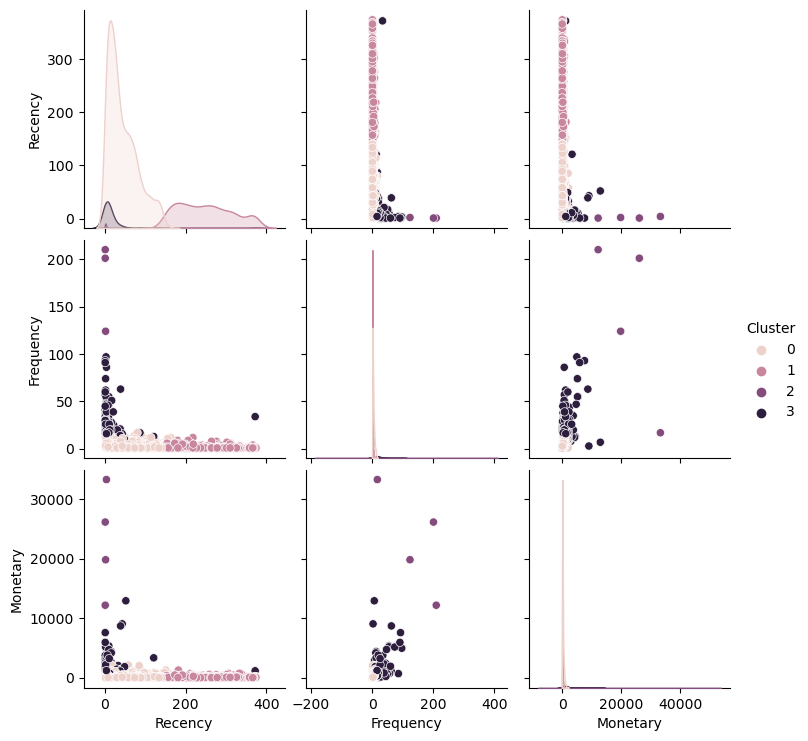

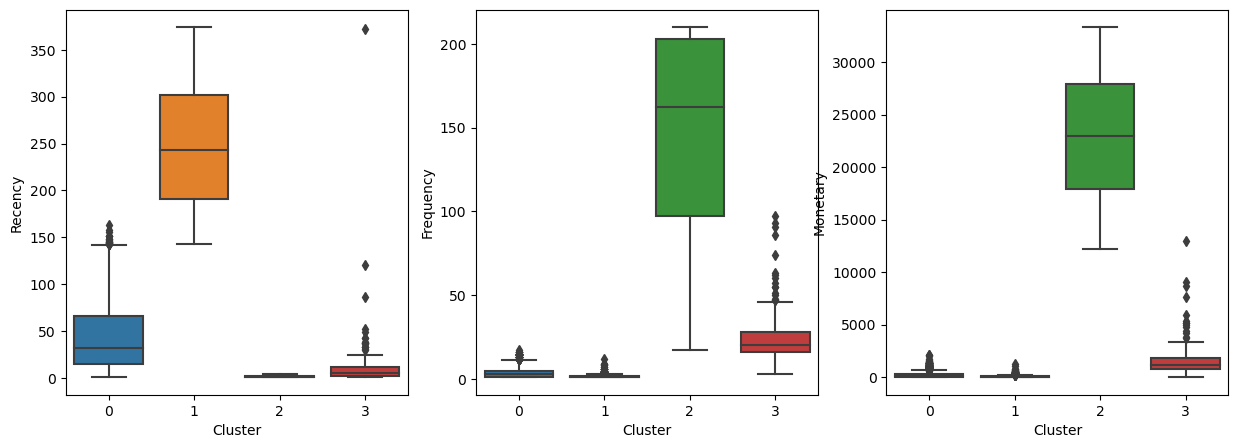

In [16]:
# Visualizations
# Pairplot for RFM variables
sns.pairplot(rfm_df[['Recency', 'Frequency', 'Monetary', 'Cluster']], hue='Cluster')
plt.show()

# Boxplots for each cluster
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, column in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(x='Cluster', y=column, data=rfm_df, ax=axes[i])
plt.show()

In [17]:
# Assign labels to clusters
cluster_labels = {
    0: 'High-Value Customers',
    1: 'Mid-Value Customers',
    2: 'Low-Value Customers',
    3: 'Churn Risk'
}

rfm_df['Cluster_Label'] = rfm_df['Cluster'].map(cluster_labels)


In [18]:
# Define marketing strategies for each cluster
marketing_strategies = {
    'High-Value Customers': 'Target with exclusive offers and loyalty rewards.',
    'Mid-Value Customers': 'Promote new products and seasonal discounts.',
    'Low-Value Customers': 'Implement re-engagement campaigns and personalized promotions.',
    'Churn Risk': 'Implement retention strategies, such as special discounts or loyalty programs.'
}

for cluster_label, strategy in marketing_strategies.items():
    print(f'{cluster_label}: {strategy}')


High-Value Customers: Target with exclusive offers and loyalty rewards.
Mid-Value Customers: Promote new products and seasonal discounts.
Low-Value Customers: Implement re-engagement campaigns and personalized promotions.
Churn Risk: Implement retention strategies, such as special discounts or loyalty programs.


In [19]:
# Optimize inventory based on cluster insights
for cluster_label in rfm_df['Cluster_Label'].unique():
    cluster_customers = rfm_df[rfm_df['Cluster_Label'] == cluster_label]
    popular_products = df[df['CustomerID'].isin(cluster_customers['CustomerID'])]['StockCode'].value_counts().head(5).index
    print(f'{cluster_label} - Popular Products: {", ".join(popular_products)}')


Mid-Value Customers - Popular Products: 85123A, 22423, 47566, 84879, 21034
High-Value Customers - Popular Products: 85123A, 22423, 84879, 85099B, 47566
Churn Risk - Popular Products: 85099B, 85123A, 22423, 20725, 47566
Low-Value Customers - Popular Products: C2, 79321, 21975, 22423, 23263
